In [67]:
import pandas as pd
import numpy as np
from scipy import stats
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [87]:
warnings.filterwarnings('ignore')
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

useducation_df_orignal = useducation_df.copy()

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [88]:
na_columns_list = list(useducation_df.columns)
del na_columns_list[:3]
for column in na_columns_list:
    useducation_df.loc[:, column] = useducation_df.loc[:, column].interpolate()

In [49]:
#na_columns_list = list(useducation_df.columns)
#del na_columns_list[:3]
#for column in na_columns_list:
    #for values in useducation_df[column]:
        #useducation_df = useducation_df.replace(0,1) 

#useducation_df2 = useducation_df.copy()
#useducation_df2.iloc[:,3:] = np.log(useducation_df.iloc[:,3:])
#na_columns_list = list(useducation_df2.columns)
#del na_columns_list[:3]
#for column in na_columns_list:
    #useducation_df2.loc[:, column] = useducation_df2.loc[:, column].interpolate()

In [70]:
pd.options.display.max_columns = 999

useducation_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.456000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.456000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1491.000000
mean,2004.433646,1.005984e+06,1.111164e+07,8.922691e+05,4.913351e+06,5.306024e+06,1.114374e+07,5.792260e+06,3.324275e+06,5.004288e+05,1.033524e+06,15926.059316,59021.465818,59797.646113,59511.380027,50207.239276,4.810102e+05,2.286678e+05,7.478782e+05,232.723472,275.734024,218.971553,263.267799
std,7.393983,1.009158e+06,1.200155e+07,1.106788e+06,5.423675e+06,5.900909e+06,1.212433e+07,6.376549e+06,3.500830e+06,5.253843e+05,1.272901e+06,28669.479212,78271.025323,78406.899202,77123.573668,66309.867155,6.286622e+05,3.005815e+05,9.291585e+05,9.405215,8.754805,5.959927,4.978792
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,0.000000,544.000000,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.973995e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.279618e+05,2.163398e+05,1544.000000,9926.750000,10117.250000,10252.000000,8951.000000,8.127325e+04,3.950675e+04,1.718665e+05,226.267129,270.096001,216.126818,260.490023
50%,2004.000000,7.540845e+05,6.351760e+06,5.165190e+05,3.119414e+06,2.650904e+06,6.499891e+06,3.318778e+06,1.910412e+06,3.415810e+05,6.436235e+05,5910.500000,38507.000000,38280.500000,38114.500000,33279.000000,3.097340e+05,1.472355e+05,4.591248e+05,234.226904,275.711254,219.771325,262.617766
75%,2011.000000,1.595024e+06,1.803650e+07,1.411794e+06,8.020633e+06,8.584803e+06,1.801704e+07,9.130766e+06,5.435244e+06,8.490842e+05,1.717212e+06,19561.000000,70748.750000,72310.250000,72598.250000,64920.500000,5.783400e+05,2.843505e+05,8.860948e+05,240.163315,282.702092,222.684611,266.849675
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,250911.000000,530531.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


## Problem 1

The reading scores compared to the math scores are quite interesting. The means for the reading scores are significantly lower than the math and their standard deviations are much lower. Not only are the reading skills behind that of math, but this pattern is fairly consistant across multiple states and years. This could point to the reading tests being more difficult than the math tests or that the approach to teaching reading needs examination and restructuring.

## Problem 2

In [83]:
texas_df = useducation_df[useducation_df['STATE'] == 'TEXAS']
texas_df = texas_df.sort_values('YEAR')

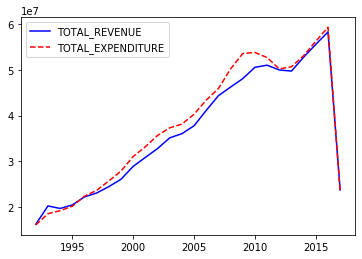

In [82]:
plt.plot( 'YEAR', 'TOTAL_REVENUE', data=texas_df, marker='', color='blue')
plt.plot( 'YEAR', 'TOTAL_EXPENDITURE', data=texas_df, marker='', color='red', linestyle='dashed')
plt.legend()
plt.show()

In 2005, Hurrican Katrina damaged much of the southeastern United States. With many people in this region losing their homes and all their belongings, they decided to move to places not as affected and with work. Many of these people moved to Texas and is reflected by the drastic increase in revenue and expenditure from 2006 - 2010.

## Problem 3

In [84]:
texas_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,26.000000,26.000000,26.000000,26.000000
mean,2004.500000,4.060531e+06,3.637511e+07,3.737729e+06,1.431132e+07,1.832607e+07,3.777038e+07,1.803141e+07,1.029576e+07,1.754171e+06,5.029807e+06,175136.442308,307295.634615,310886.653846,303492.288462,231851.442308,2.500666e+06,1.121922e+06,3.814330e+06,231.351599,273.864306,216.528993,263.950412
std,7.648529,1.026794e+06,1.311006e+07,2.066431e+06,4.688650e+06,6.653372e+06,1.385243e+07,6.181149e+06,3.571339e+06,7.051296e+05,2.147256e+06,67137.895193,89629.166680,86731.808487,84940.009069,73693.147157,6.973295e+05,3.285792e+05,1.028437e+06,8.701462,8.610991,3.605214,3.828360
min,1992.000000,4.087135e+05,1.626418e+07,1.160185e+06,6.706959e+06,8.397036e+06,1.611908e+07,7.961379e+06,4.613884e+06,1.310675e+05,1.717181e+06,270.000000,1006.000000,1212.000000,1103.000000,1024.000000,9.403000e+03,5.084000e+03,4.465080e+05,212.342195,257.530823,208.154012,258.239380
25%,1998.250000,3.841790e+06,2.394621e+07,1.724350e+06,1.009781e+07,1.221860e+07,2.418425e+07,1.238665e+07,7.047886e+06,1.183127e+06,3.250635e+06,134219.500000,286172.250000,295046.750000,291161.500000,198038.250000,2.388074e+06,1.036572e+06,3.558528e+06,226.912302,268.966470,214.879809,260.874202
50%,2004.500000,4.234622e+06,3.559918e+07,3.571403e+06,1.310930e+07,1.858958e+07,3.774206e+07,1.815070e+07,1.038684e+07,1.764724e+06,5.149120e+06,188945.000000,319396.000000,321700.000000,320590.500000,241186.000000,2.597784e+06,1.189662e+06,3.976391e+06,231.876366,272.041006,217.738699,262.819297
75%,2010.750000,4.708412e+06,4.932279e+07,5.460844e+06,1.944233e+07,2.365195e+07,5.055987e+07,2.390081e+07,1.391557e+07,2.373582e+06,6.459794e+06,235462.250000,367654.250000,365025.750000,345780.000000,288424.500000,2.898772e+06,1.323806e+06,4.458040e+06,239.674948,280.090296,218.651098,266.951425
max,2017.000000,5.053291e+06,5.828416e+07,7.984614e+06,2.200430e+07,3.032651e+07,5.931488e+07,2.786220e+07,1.516901e+07,2.855527e+06,9.297597e+06,250911.000000,391731.000000,397085.000000,388428.000000,323708.000000,3.188705e+06,1.492452e+06,4.924653e+06,244.002472,290.346709,222.700122,270.791056


Much like the national average, Texas' reading scores are worse than the math ones.

## Problem 4

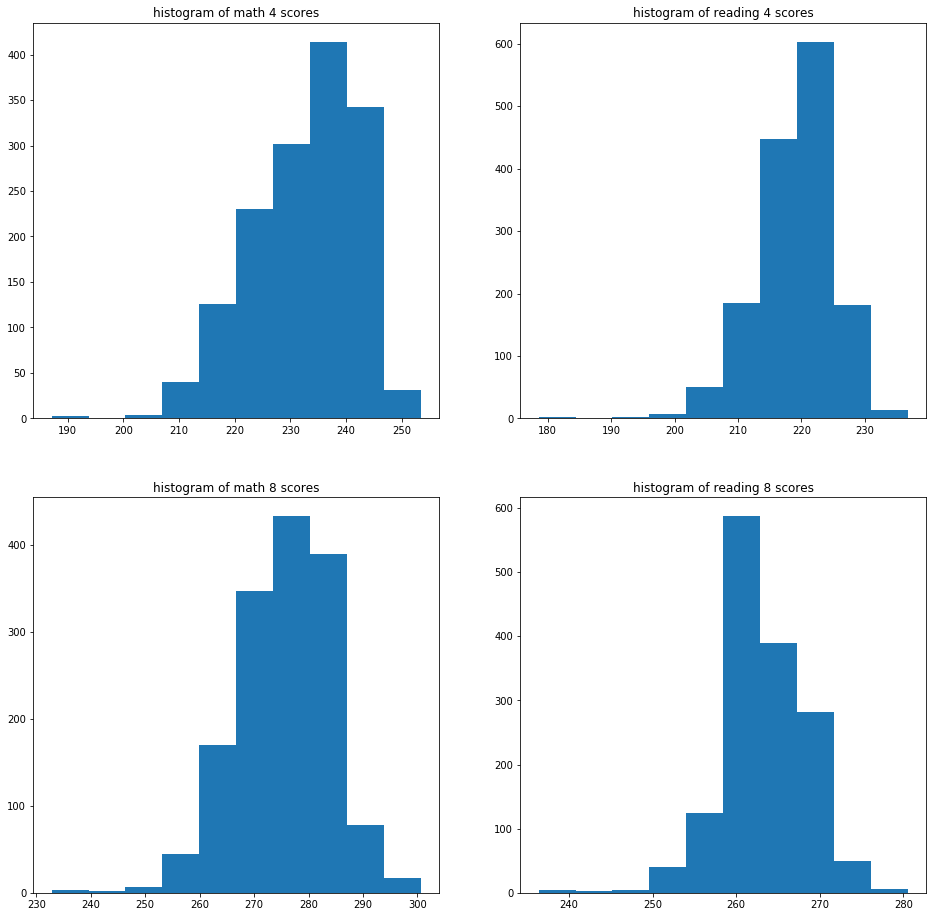

In [86]:
plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
plt.hist(useducation_df["AVG_MATH_4_SCORE"])
plt.title("histogram of math 4 scores")

plt.subplot(2, 2, 2)
plt.hist(useducation_df["AVG_READING_4_SCORE"])
plt.title("histogram of reading 4 scores")

plt.subplot(2, 2, 3)
plt.hist(useducation_df["AVG_MATH_8_SCORE"])
plt.title("histogram of math 8 scores")

plt.subplot(2, 2, 4)
plt.hist(useducation_df["AVG_READING_8_SCORE"])
plt.title("histogram of reading 8 scores")

plt.show()

## Problem 5

In [98]:
scores_df = useducation_df[['AVG_MATH_4_SCORE','AVG_READING_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_8_SCORE']]
scores_df.describe()

,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
count,1492.000000,1492.000000,1492.000000,1491.000000
mean,232.723472,218.971553,275.734024,263.267799
std,9.405215,5.959927,8.754805,4.978792
min,187.134670,178.557612,232.831510,236.379102
25%,226.267129,216.126818,270.096001,260.490023
50%,234.226904,219.771325,275.711254,262.617766
75%,240.163315,222.684611,282.702092,266.849675
max,253.420961,236.773867,300.568235,280.499130


In [93]:
#Filling with mean

scores_df_mean = scores_df.copy()
na_columns_list = list(scores_df_mean.columns)
for column in na_columns_list:
    scores_df_mean.loc[:, column] = scores_df_mean.loc[:, column].fillna(scores_df_mean.loc[:, column].mean())
    
scores_df_mean.describe()

,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
count,1492.000000,1492.000000,1492.000000,1492.000000
mean,232.723472,218.971553,275.734024,263.267799
std,9.405215,5.959927,8.754805,4.977122
min,187.134670,178.557612,232.831510,236.379102
25%,226.267129,216.126818,270.096001,260.490867
50%,234.226904,219.771325,275.711254,262.625738
75%,240.163315,222.684611,282.702092,266.847503
max,253.420961,236.773867,300.568235,280.499130


In [96]:
#Filling with median

scores_df_median = scores_df.copy()
na_columns_list = list(scores_df_median.columns)
for column in na_columns_list:
    scores_df_median.loc[:, column] = scores_df_median.loc[:, column].fillna(scores_df_median.loc[:, column].median())
    
scores_df_median.describe()

,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
count,1492.000000,1492.000000,1492.000000,1492.000000
mean,232.723472,218.971553,275.734024,263.267363
std,9.405215,5.959927,8.754805,4.977150
min,187.134670,178.557612,232.831510,236.379102
25%,226.267129,216.126818,270.096001,260.490867
50%,234.226904,219.771325,275.711254,262.617766
75%,240.163315,222.684611,282.702092,266.847503
max,253.420961,236.773867,300.568235,280.499130


In [97]:
scores_df_interpolation = scores_df.copy()
na_columns_list = list(scores_df_interpolation.columns)
for column in na_columns_list:
    scores_df_interpolation.loc[:, column] = scores_df_interpolation.loc[:, column].interpolate()
    
scores_df_interpolation.describe()

,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
count,1492.000000,1492.000000,1492.000000,1491.000000
mean,232.723472,218.971553,275.734024,263.267799
std,9.405215,5.959927,8.754805,4.978792
min,187.134670,178.557612,232.831510,236.379102
25%,226.267129,216.126818,270.096001,260.490023
50%,234.226904,219.771325,275.711254,262.617766
75%,240.163315,222.684611,282.702092,266.849675
max,253.420961,236.773867,300.568235,280.499130


The interpolation method shows the least change from the original data. However, there is only a little variation seen when you use the mean and median fill methods. If there were more missing values then the difference would be more obvious.